In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from scipy.stats import expon
from scipy.stats import norm
from scipy import stats

from collections import Counter

from math import radians, cos, sin, asin, sqrt

import warnings
#忽略报错函数
def ignore_warn(*args, **kwargs):
    pass
    warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

In [2]:
#定义数据读取函数
# df= pd.read_csv('步骤二后的数据.csv')
path = 'C:\\Users\\ASUS\\Desktop\\IOM魔改2\\IOM209\\步骤二后的数据.csv'
try:
    # 将 low_memory 设置为 False
    df = pd.read_csv(path, low_memory=False)
    print("文件读取成功")
except FileNotFoundError:
    print("文件未找到，请检查文件路径。")
except Exception as e:
    print(f"发生其他错误: {e}")

文件读取成功


In [3]:
#显示数据类型
df.dtypes

Lng                    float64
Lat                    float64
tradeTime                int64
followers                int64
totalPrice             float64
price                  float64
square                 float64
livingRoom               int64
drawingRoom              int64
kitchen                float64
bathRoom                 int64
floor                   object
buildingType           float64
constructionTime       float64
renovationCondition      int64
buildingStructure        int64
ladderRatio            float64
elevator                 int64
fiveYearsProperty        int64
subway                   int64
district                 int64
communityAverage       float64
distance               float64
Age                      int64
floorType              float64
floorHeight              int64
dtype: object

[Text(0.5, 0, 'Latitude'),
 Text(0, 0.5, 'Longitude'),
 Text(0.5, 1.0, 'Price Distribution Distance Wise')]

D:\ML\Anaconda3\envs\jupyter\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


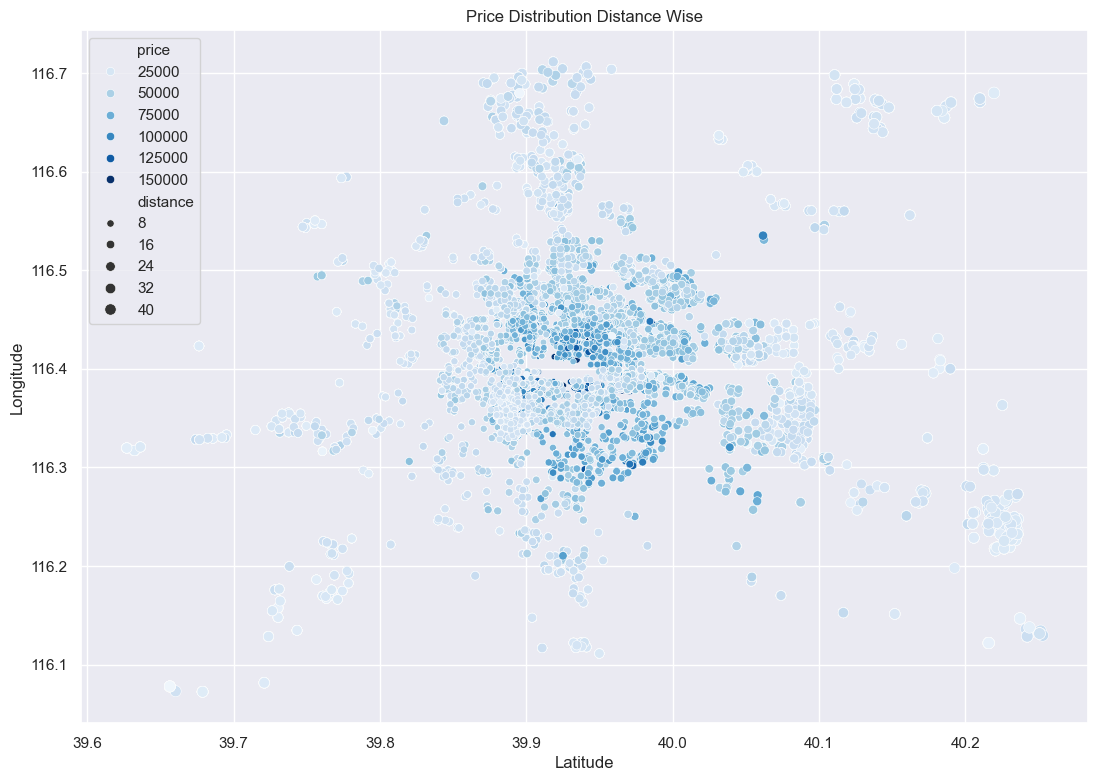

In [4]:
#展示房价与distance的关系网
sns.set(rc={'figure.figsize':(13,9)})
ax = sns.scatterplot(
    data=df,          
    x="Lat",           # 横轴：纬度
    y="Lng",           # 纵轴：经度
    hue="price",       # 点的颜色代表单价（price），颜色越深/浅表示价格变化
    size='distance',   # 点的大小根据 distance（与市中心的距离）变化
    legend='brief',   
    palette=""
)
ax.set(
    xlabel="Latitude", 
    ylabel="Longitude", 
    title="Price Distribution Distance Wise"
)

[Text(0.5, 0, 'Districts'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Correlation between District and Price')]

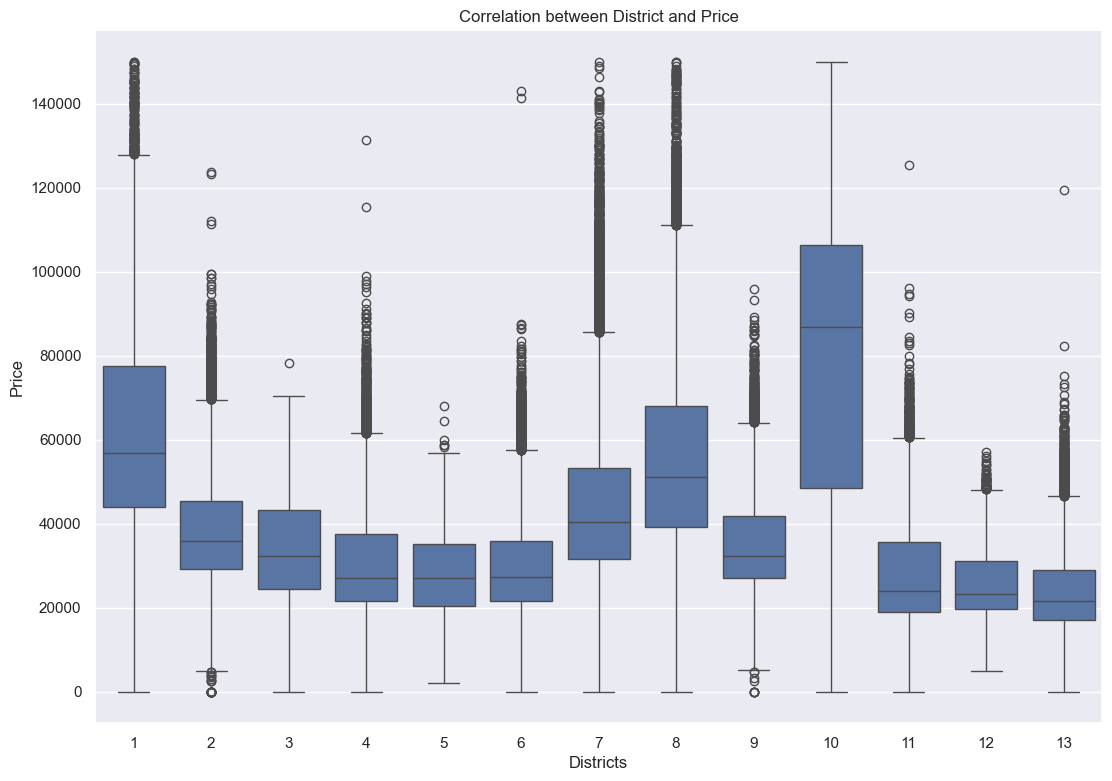

In [5]:
#查看不同区域房价的状况
sns.set(rc={'figure.figsize':(13,9)})
ax = sns.boxplot(data=df, x="district", y="price")#横轴是区域编号，纵轴是每平米单价
ax.set(xlabel="Districts", ylabel = "Price", title = "Correlation between District and Price")

[Text(0.5, 0, 'Building Type'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Correlation between Building Type and Price')]

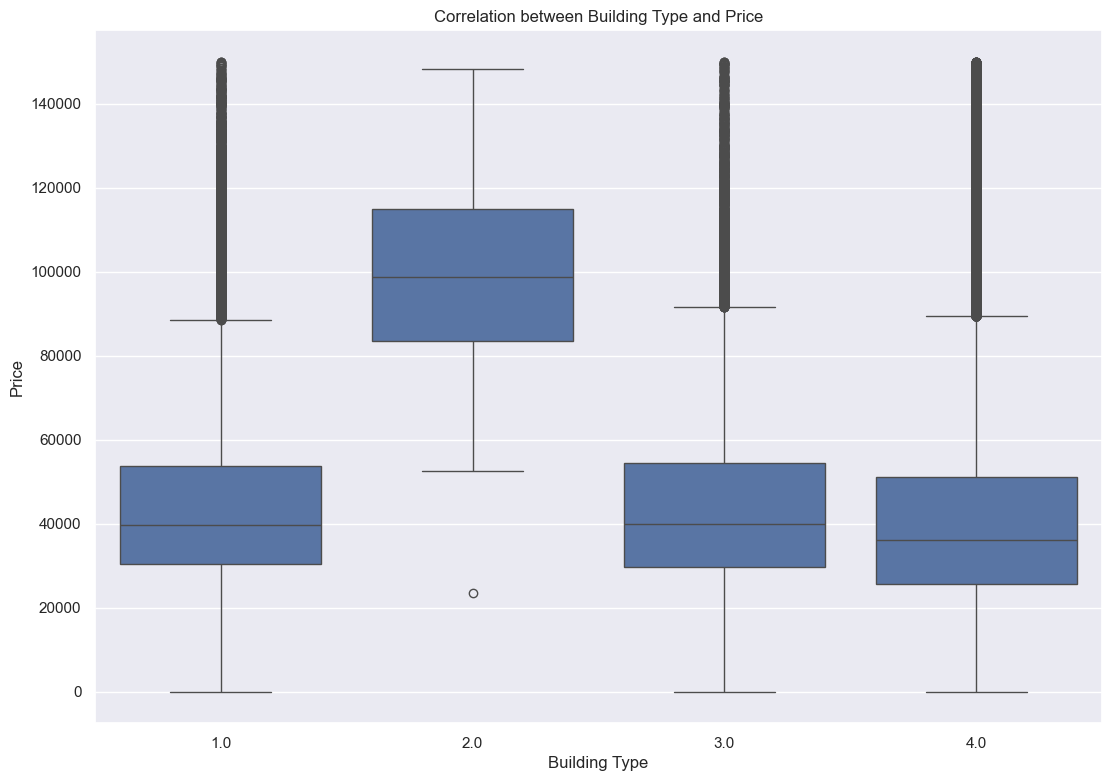

In [6]:
#同理，绘制建筑类型与房价的箱线图
sns.set(rc={'figure.figsize':(13,9)})
ax = sns.boxplot(data=df, x="buildingType", y="price")
ax.set(xlabel="Building Type", ylabel = "Price",title = "Correlation between Building Type and Price")

[Text(0.5, 0, 'Building Type'),
 Text(0, 0.5, 'Square'),
 Text(0.5, 1.0, 'Correlation between Building Type and Square')]

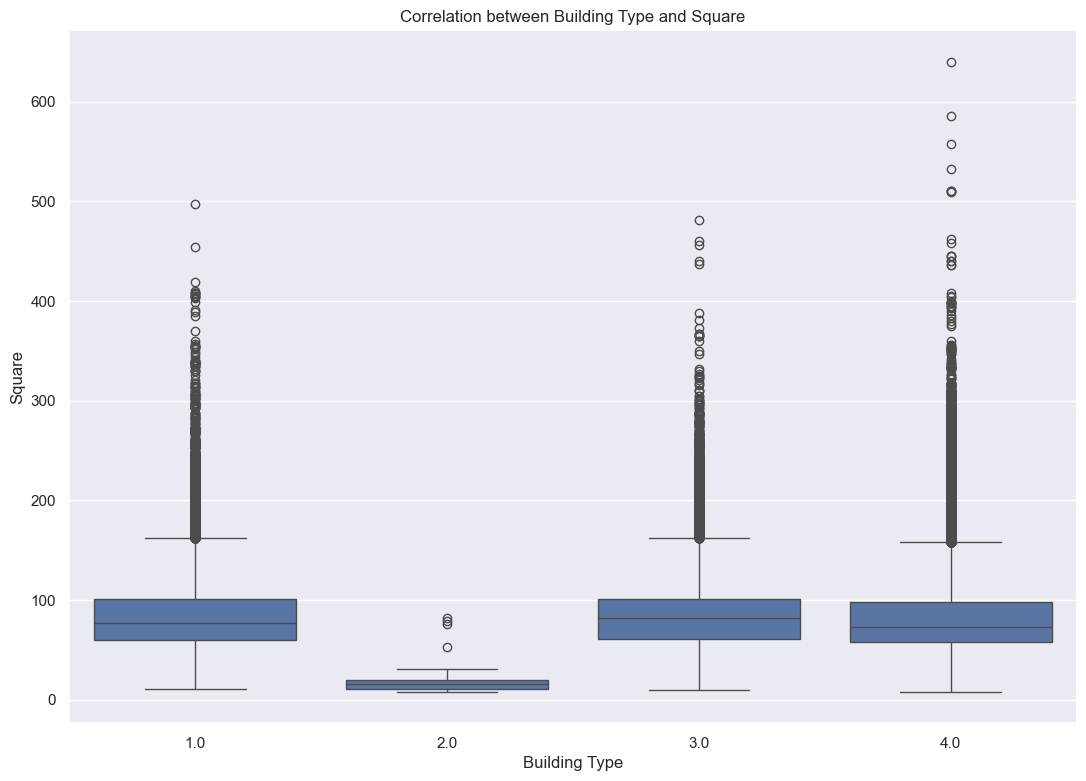

In [7]:
#同理，看buildingType与面积square的关系
sns.set(rc={'figure.figsize':(13,9)})
ax = sns.boxplot(data=df, x="buildingType", y="square")
ax.set(xlabel="Building Type", ylabel = "Square",title = "Correlation between Building Type and Square")

In [8]:
df.to_csv("步骤三后的数据.csv",index=False)